In [1]:
# Import packages and libraries

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import scipy.stats as scs
import matplotlib.pyplot as plt
%matplotlib inline
from yellowbrick.cluster import SilhouetteVisualizer
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import data

med_file = r"C:\Users\mlaws\OneDrive - Western Governors University\Documents\WGU\D212\medical_clean.csv"
med_load = pd.read_csv(med_file)
df = med_load[['Initial_days','TotalCharge']]

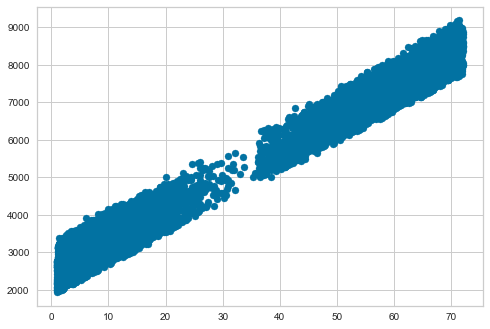

In [3]:
plt.scatter(df['Initial_days'],df['TotalCharge'])

In [4]:
k_rng = range(1,10)
sse=[]
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df[['Initial_days','TotalCharge']])
    sse.append(km.inertia_)

In [5]:
sse

[47543339884.5724,
 4871087336.61752,
 2752775026.7966037,
 1598292964.0250416,
 1107979375.3980348,
 820294714.3971909,
 607125195.5550231,
 476498145.3676724,
 381875743.4281159]

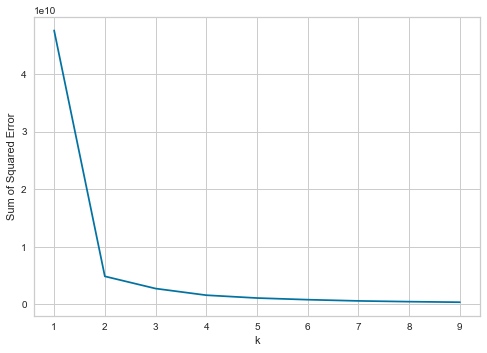

In [6]:
plt.xlabel('k')
plt.ylabel('Sum of Squared Error')
plt.plot(k_rng, sse)

In [7]:
km = KMeans(n_clusters=2)
km

KMeans(n_clusters=2)

In [8]:
y_pred = km.fit_predict(df[['Initial_days','TotalCharge']])
y_pred

array([1, 1, 1, ..., 0, 0, 0])

In [9]:
df['Cluster'] = y_pred
df.head()

,Initial_days,TotalCharge,Cluster
0,10.585770,3726.702860,1
1,15.129562,4193.190458,1
2,4.772177,2434.234222,1
3,1.714879,2127.830423,1
4,1.254807,2113.073274,1


In [10]:
df1 = df[df.Cluster==0]
df2 = df[df.Cluster==1]

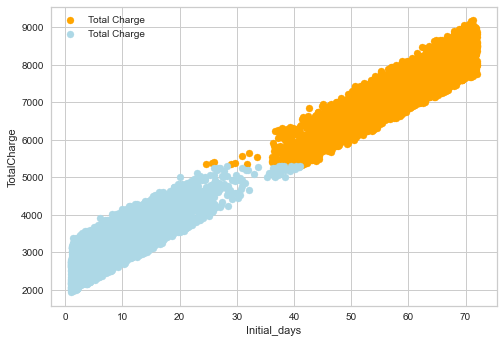

In [11]:
plt.scatter(df1.Initial_days,df1['TotalCharge'], color = 'orange')
plt.scatter(df2.Initial_days,df2['TotalCharge'], color = 'lightblue')

plt.xlabel('Initial_days')
plt.ylabel('TotalCharge')
plt.legend(['Total Charge', 'Total Charge'])

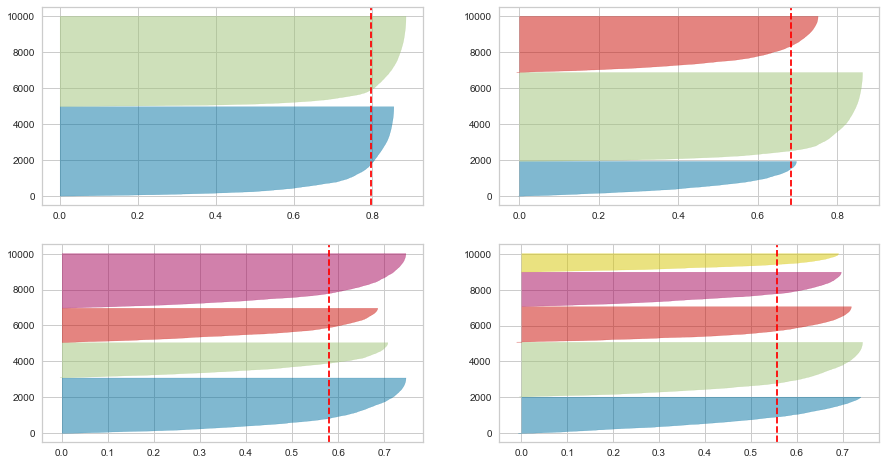

In [12]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df)

In [13]:
# Export prepared data sets
df.to_csv(r"C:\Users\mlaws\OneDrive - Western Governors University\Documents\WGU\D212\medical_kmeans.csv")